<a href="https://colab.research.google.com/github/leenagite/Internship/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df=df.drop(columns=["PassengerId","Name"])

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.drop(columns=["Ticket"],inplace=True)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [ ]:
#checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#filling age Nan value with mean
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [ ]:
df.drop(columns=["Cabin"],inplace=True)

In [ ]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [ ]:
#checking null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df = pd.get_dummies (df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 903 entries, PassengerId to Embarked_S
dtypes: float64(2), int64(5), uint8(896)
memory usage: 828.5 KB


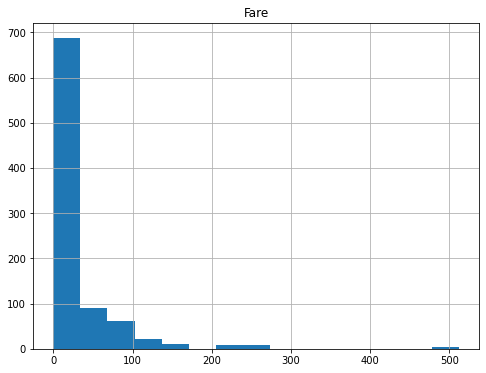

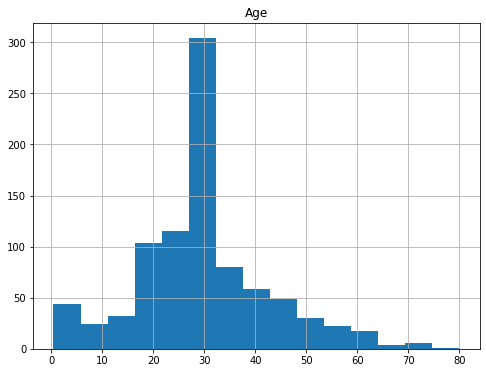

In [ ]:
import matplotlib.pyplot as plt

#checking if outliers present in age and fare
df['Fare'].hist(figsize=(8,6),bins = 15)
plt.title("Fare")
plt.show()

df['Age'].hist(figsize=(8,6),bins = 15)
plt.title("Age")
plt.show()


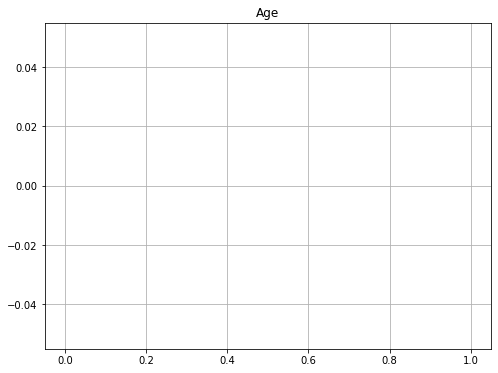

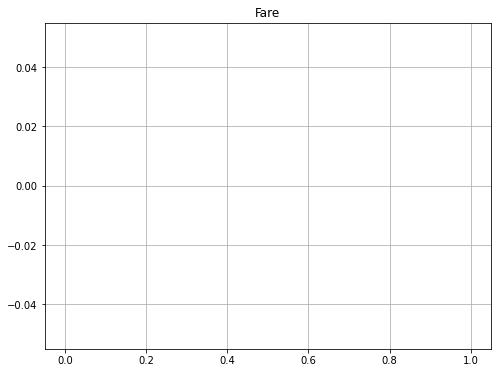

In [ ]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

#plotting age without outliers
df_new['Age'].hist(figsize=(8,6),bins = 15)
plt.title("Age")
plt.show()

#plotting fare without outliers
df_new['Fare'].hist(figsize=(8,6),bins = 15)
plt.title("Fare")
plt.show()

In [ ]:
#Checking the value count 
df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [ ]:
print("Dataframe shape with outliers",df.shape)
print("Dataframe shape without outliers",df_new.shape)

Dataframe shape with outliers (891, 903)
Dataframe shape without outliers (0, 903)


In [ ]:
#standardising the data for PCA
x=df.drop(columns=["Survived"])
y=df['Survived']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

In [ ]:
#PCA

from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([  0.38609177,   0.71602006,   1.01305454,   1.27193454,
         1.49302284,   1.70898944,   1.8947237 ,   2.06764084,
         2.218416  ,   2.32940532,   2.44039463,   2.55138394,
         2.66237325,   2.77336257,   2.88435188,   2.99534119,
         3.1063305 ,   3.21731981,   3.32830913,   3.43929844,
         3.55028775,   3.66127706,   3.77226637,   3.88325569,
         3.994245  ,   4.10523431,   4.21622362,   4.32721294,
         4.43820225,   4.54919156,   4.66018087,   4.77117018,
         4.8821595 ,   4.99314881,   5.10413812,   5.21512743,
         5.32611674,   5.43710606,   5.54809537,   5.65908468,
         5.77007399,   5.88106331,   5.99205262,   6.10304193,
         6.21403124,   6.32502055,   6.43600987,   6.54699918,
         6.65798849,   6.7689778 ,   6.87996711,   6.99095643,
         7.10194574,   7.21293505,   7.32392436,   7.43491367,
         7.54590299,   7.6568923 ,   7.76788161,   7.87887092,
         7.98986024,   8.10084955,   8.21183886,   8.32

In [ ]:
# PCs explaines 90% of the variance?

k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  844


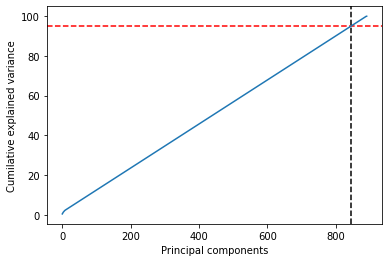

In [ ]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=95,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [ ]:
# Creating final dataset 

FinalPCA=PCA(n_components=6)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5
0,-1.765075,-0.902165,-0.323873,0.752534,-2.380434,-0.697638
1,3.793366,2.022111,-0.079139,-0.096303,-2.388235,-1.139144
2,0.610519,-1.709072,-0.751705,-2.016261,-2.267296,-1.680954
3,1.913158,-0.731966,1.362346,-1.811405,-2.611141,0.128298
4,-1.941482,-0.095678,-0.074292,-0.307337,-2.555091,-0.381192
...,...,...,...,...,...,...
886,-1.632256,0.354135,0.906828,-0.278391,2.284398,-0.094721
887,1.451061,-0.698323,1.090487,-2.173438,2.437587,-0.839407
888,1.497646,-2.732115,0.300397,-0.419449,2.768163,0.205393
889,0.627009,3.427675,0.077316,1.404660,2.461710,-1.149836


In [ ]:
df=FinalData2

In [ ]:
#analysing data
df.describe()



,0,1,2,3,4,5
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.472146e-16,9.569599e-17,-1.275947e-16,2.472146e-16,-2.551893e-16,-2.073413e-16
std,1.867206e+00,1.726059e+00,1.637734e+00,1.528814e+00,1.412040e+00,1.393962e+00
min,-2.140075e+00,-5.464140e+00,-4.899551e+00,-3.442336e+00,-2.940373e+00,-3.274272e+00
25%,-1.657885e+00,-8.489902e-01,-3.451246e-01,-9.117841e-01,-1.193353e+00,-8.447302e-01
50%,-5.125154e-01,-9.115404e-02,1.291289e-01,-1.183421e-01,-3.207685e-02,-2.425445e-01
75%,1.433782e+00,9.807635e-01,8.562403e-01,5.973824e-01,1.161294e+00,6.058409e-01
max,7.426265e+00,5.630255e+00,5.327740e+00,6.164231e+00,3.136311e+00,5.724499e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       891 non-null    float64
 1   1       891 non-null    float64
 2   2       891 non-null    float64
 3   3       891 non-null    float64
 4   4       891 non-null    float64
 5   5       891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [ ]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [ ]:
#library to split data
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [ ]:
y_train.head()

578    0
323    1
654    0
157    0
692    1
Name: Survived, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression


#Finding best random state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

NameError: ignored

In [ ]:
 x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=150)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

NameError: ignored

In [ ]:
#modelling
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

NameError: ignored

In [ ]:
#modelling
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

NameError: ignored

In [ ]:
#Finding overfitting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross validation score of Logistic Regression model : 0.7822735547046639
Cross validation score of Decision Tree model : 0.7757328479065972
Cross validation score of Random Forest model : 0.810369719414977
Cross validation score of SVC model : 0.6386353650116126


In [ ]:
from sklearn.model_selection import GridSearchCV 
paramters={'n_estimators':[2,3,4,5],
           'criterion':['gini','entropy'],
           'min_samples_split':[2,3,4,5],
           'min_samples_leaf':[2,3,4,5,6],
           'max_leaf_nodes':[2,3,4,5,10],
}

GCV=GridSearchCV(RandomForestClassifier(),paramters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [2, 3, 4, 5]})

In [ ]:
GCV.best_params_

{'criterion': 'entropy',
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 5}

In [ ]:
mod=RandomForestClassifier(criterion='entropy',max_leaf_nodes=10,min_samples_leaf=2,min_samples_split=4,n_estimators=2)

In [ ]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

NameError: ignored

In [ ]:
#Saving of model
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
filename='finalized_model.pickle'
pickle.dump(random_forest_model,open(filename,'wb'))

NameError: ignored

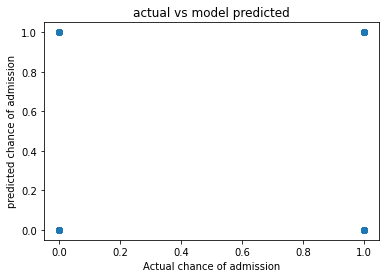

In [ ]:
#Adjusted accuracy
random_forest_model.score(x_train,y_train)
y_pred=random_forest_model.predict(x_test)
plt.scatter(y_test,y_pred)

plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()